# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [8]:
import pandas as pd

df = pd.read_csv('dados_ativos/PETR4.SA_historico.csv')
print(df.columns)
print(df.head())

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude'], dtype='object')
        Price               Close                High                 Low  \
0      Ticker            PETR4.SA            PETR4.SA            PETR4.SA   
1        Date                 NaN                 NaN                 NaN   
2  2023-05-31  18.101566314697266  18.267889884100917  17.928312431340686   
3  2023-06-01   18.68369483947754  18.711416090382293  18.129283039602416   
4  2023-06-02   18.83616065979004  19.127227209656496   18.78764978844931   

                 Open    Volume  Amplitude  
0            PETR4.SA  PETR4.SA        NaN  
1                 NaN       NaN        NaN  
2   18.20551838034677  49207600   0.339577  
3  18.226304774125065  63148200   0.582133  
4   19.00941452704812  39919300   0.339577  


In [9]:
import pandas as pd

ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
dados = {}

for ativo in ativos:
    df = pd.read_csv(f'dados_ativos/{ativo}_historico.csv', skiprows=2, index_col=0, parse_dates=True)
    dados[ativo] = df
    print(f"\n{ativo} - dados carregados:")
    print(df.head())


PETR4.SA - dados carregados:
            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
Date                                                                     
2023-05-31   18.101566   18.267890   17.928312   18.205518    49207600   
2023-06-01   18.683695   18.711416   18.129283   18.226305    63148200   
2023-06-02   18.836161   19.127227   18.787650   19.009415    39919300   
2023-06-05   19.037134   19.099506   18.870811   19.085646    39321700   
2023-06-06   19.439083   19.577687   18.856950   19.023275    75426600   

            Unnamed: 6  
Date                    
2023-05-31    0.339577  
2023-06-01    0.582133  
2023-06-02    0.339577  
2023-06-05    0.228695  
2023-06-06    0.720737  

VALE3.SA - dados carregados:
            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
Date                                                                     
2023-05-31   52.930866   53.810145   52.682011   53.320733   103408900   
2023-06-01   54.050705  

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [10]:
colunas = ['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']

for ativo, df in dados.items():
    df.columns = colunas
    print(f"{ativo} colunas renomeadas:", df.columns.tolist())

PETR4.SA colunas renomeadas: ['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']
VALE3.SA colunas renomeadas: ['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']
ITUB4.SA colunas renomeadas: ['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']


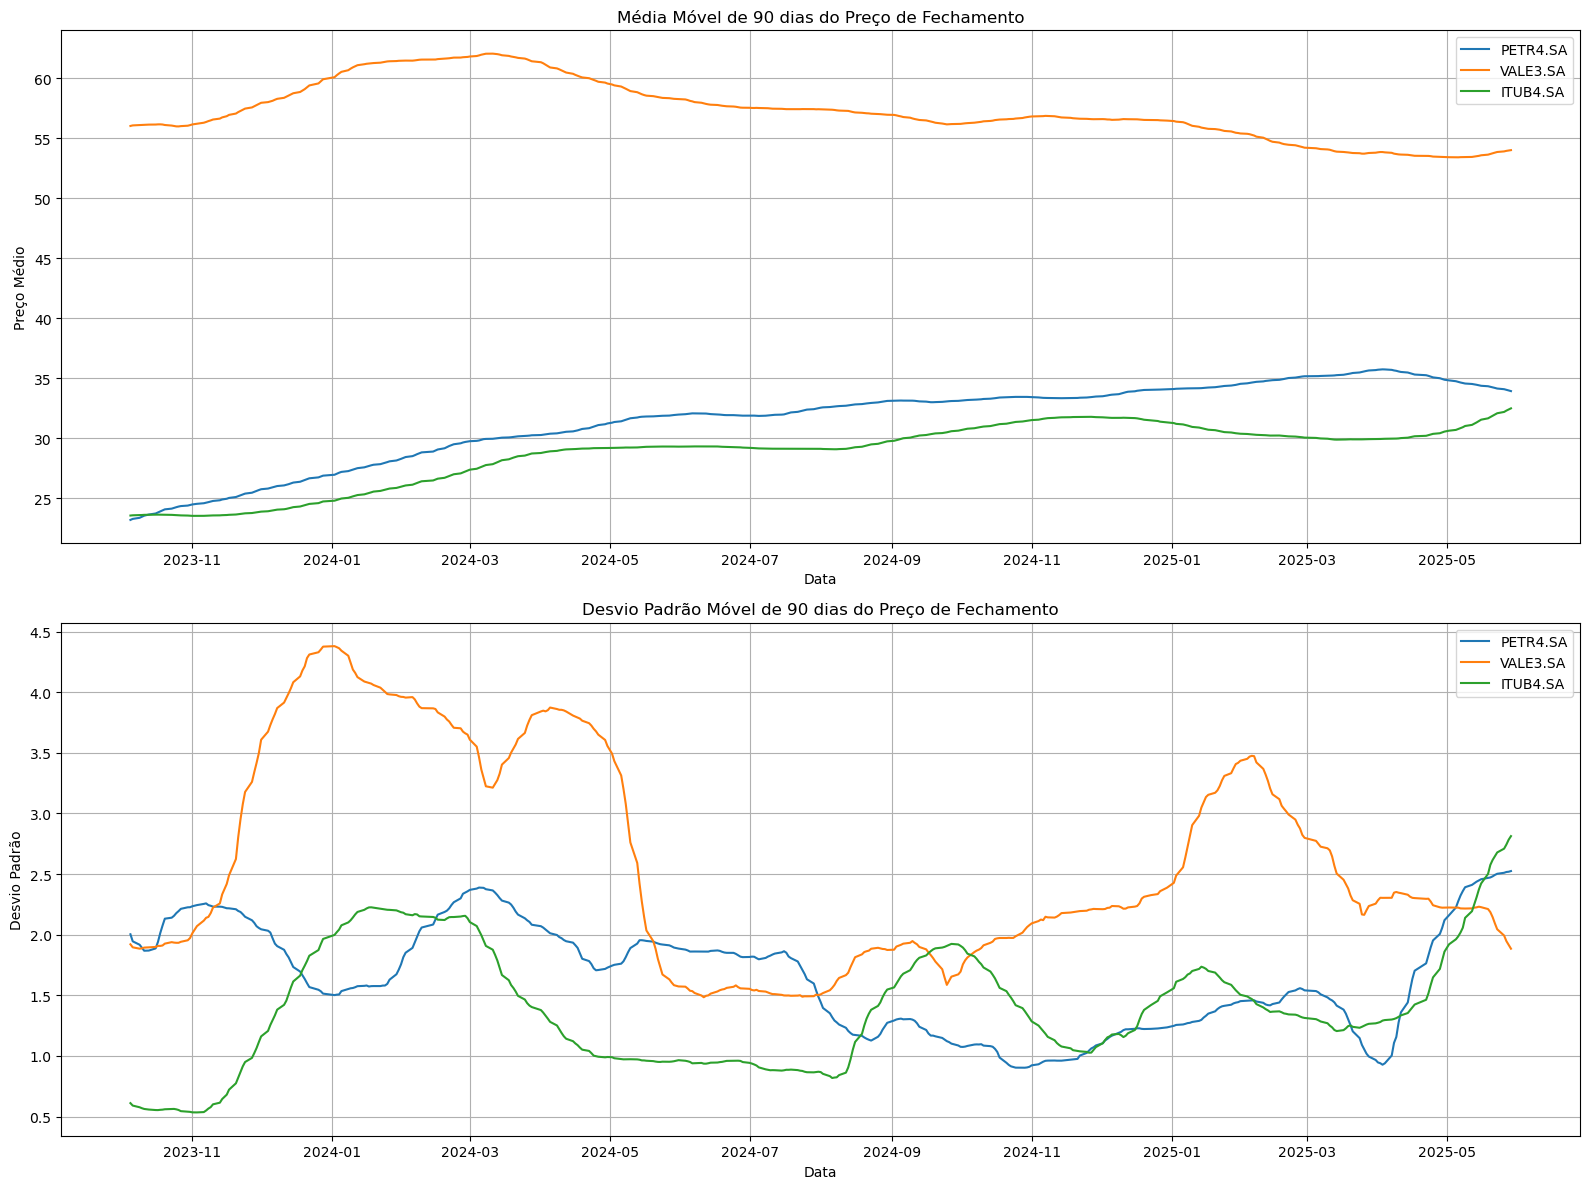

In [11]:
import matplotlib.pyplot as plt

window = 90

plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
for ativo, df in dados.items():
    df['Media_Movel'] = df['Close'].rolling(window=window).mean()
    plt.plot(df.index, df['Media_Movel'], label=ativo)
plt.title('Média Móvel de 90 dias do Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for ativo, df in dados.items():
    df['Desvio_Padrao'] = df['Close'].rolling(window=window).std()
    plt.plot(df.index, df['Desvio_Padrao'], label=ativo)
plt.title('Desvio Padrão Móvel de 90 dias do Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Desvio Padrão')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Ambos gráficos apresentam bastante volatilidade.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [13]:
!pip install mplfinance

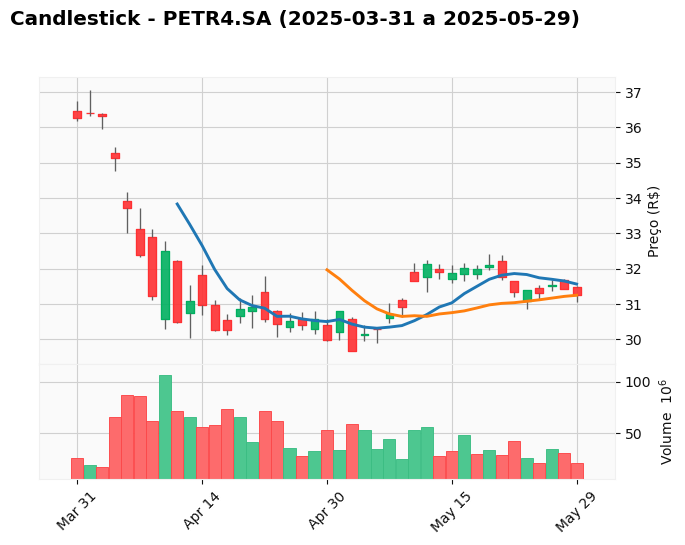

In [19]:
import pandas as pd
import mplfinance as mpf

df = dados['PETR4.SA'].copy()

df.index = pd.to_datetime(df.index)

df = df.sort_index()

df = df.iloc[:, 0:6]

df.columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']

data_final = df.index.max()
data_inicial = data_final - pd.Timedelta(days=59)
df_60_corridos = df.loc[(df.index >= data_inicial) & (df.index <= data_final)]

df_60_corridos = df_60_corridos[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(
    df_60_corridos,
    type='candle',
    style='yahoo',
    title=f'Candlestick - PETR4.SA ({data_inicial.date()} a {data_final.date()})',
    ylabel='Preço (R$)',
    volume=True,
    mav=(9, 21)
)